# California Maps

This notebook contains maps of California paired with different wildfire plots. The notebook contains logic for generating maps of where fires occured, how large they were, and what caused them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls 

drive  sample_data


In [5]:
cleaned = pd.read_csv("/content/drive/Shareddrives/Data Science 303 Group Project/csv/cleaned_fires_data_with_four_closest_stations_nov21.csv")
cleaned = cleaned.replace([np.inf, -np.inf], np.nan)
cleaned = cleaned.dropna()

In [6]:
STATION_LIST = ["BODIE", "BROOKS", "COHASSET", "EEL_RIVER", "HELL_HOLE", "HERNANDEZ"]
STATION_LIST += ["HUNTER_MOUNTAIN", "JUANITA_LAKE", "LADDER_BUTTE", "LAS_TABLAS", "LA_HONDA", "OAK_CREEK"]
STATION_LIST += ["PANAMINT", "PILOT_HILL", "SCORPION", "SOLDIER_MOUNTAIN", "SQUAW_LAKE", "STAMPEDE", "VAN_BREMMER", "WOLVERTON"]
STATION_LIST = set(STATION_LIST)

## Data Normalization: MinMax scaling latitude and longitude

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

lat = scaler.fit_transform(np.array(cleaned["LATITUDE"]).reshape(-1, 1))
long = scaler.fit_transform(np.array(cleaned["LONGITUDE"]).reshape(-1, 1))

# DROP ALL LATITUDE LONGITUDE COLUMNS, THEN READD THE SCALED LATITUDE AND LONGITUDE
drops = []
for col in cleaned.columns:
  if "LATITUDE" in col or "LONGITUDE" in col:
    drops.append(col)

for col in drops:
  del cleaned[col]

cleaned["S_LATITUDE"] = lat
cleaned["S_LONGITUDE"] = long


In [ ]:
# Elevation for the primary station is redundant. Drop all elevation columns from the primary station, except for one
elevation = cleaned["PRIMARY_STATION_1_MONTHS_PRIOR_ELEVATION"]

drops = []
for col in cleaned.columns:
  if "PRIMARY_STATION" in col and "ELEVATION" in col:
    drops.append(col)

for col in drops:
  del cleaned[col]

cleaned["PRIMARY_STATION_ELEVATION"] = elevation


In [ ]:
cleaned['DURATION'] = (cleaned['CONT_DOY']-cleaned['DISCOVERY_DOY'])%365

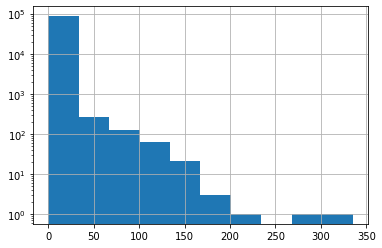

In [ ]:
cleaned['DURATION'].max()
cleaned['DURATION'].hist(log=True)

In [7]:
numerical = cleaned.select_dtypes(include="number")
numerical.head()
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87106 entries, 0 to 87105
Columns: 292 entries, Unnamed: 0 to WOLVERTON
dtypes: float64(285), int64(7)
memory usage: 194.7 MB


In [ ]:
cols = numerical.columns
closest = []

for col in cols:
  if (col[:16] == 'CLOSEST_STATION_' or col in STATION_LIST or col == "S_LATITUDE" or col == "S_LONGITUDE"): 
    closest.append(col)

In [ ]:
primary_station_data_cols = []
for col in cols:
  if ("PRIMARY_STATION" in col or col in STATION_LIST or col == "S_LATITUDE" or col == "S_LONGITUDE"): 
    primary_station_data_cols.append(col)

primary_station_df = pd.DataFrame()
for col in primary_station_data_cols:
  primary_station_df[col] = numerical[col]

primary_station_df["FIRE_SIZE"] = numerical["FIRE_SIZE"]
primary_station_df["DURATION"] = numerical["DURATION"]


In [ ]:
NUM_FEATURES_TO_KEEP = 30 + 2
correlation = primary_station_df.corr(method='pearson')
highest_correlation = (correlation.nlargest(NUM_FEATURES_TO_KEEP, 'FIRE_SIZE').index)

fire_size_prediction_df = primary_station_df[highest_correlation]
del fire_size_prediction_df["FIRE_SIZE"]
del fire_size_prediction_df["DURATION"]

TOP 32 FEATURES WITH HIGHEST CORRELATION TO FIRE SIZE
['FIRE_SIZE', 'DURATION', 'PRIMARY_STATION_13_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH', 'PRIMARY_STATION_1_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH', 'PRIMARY_STATION_13_MONTHS_PRIOR_TEMPERATURE_MAX', 'PRIMARY_STATION_1_MONTHS_PRIOR_TEMPERATURE_MAX', 'PRIMARY_STATION_12_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT', 'PRIMARY_STATION_12_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT', 'PRIMARY_STATION_13_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT', 'PRIMARY_STATION_1_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT', 'PRIMARY_STATION_12_MONTHS_PRIOR_TEMPERATURE_MAX', 'PRIMARY_STATION_12_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH', 'PRIMARY_STATION_13_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY', 'PRIMARY_STATION_1_MONTHS_PRIOR_NUM_COOLING_DEGREE_DAY', 'PRIMARY_STATION_14_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH', 'PRIMARY_STATION_2_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH',

Index(['PRIMARY_STATION_13_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH',
       'PRIMARY_STATION_1_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH',
       'PRIMARY_STATION_13_MONTHS_PRIOR_TEMPERATURE_MAX',
       'PRIMARY_STATION_1_MONTHS_PRIOR_TEMPERATURE_MAX',
       'PRIMARY_STATION_12_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT',
       'PRIMARY_STATION_12_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT',
       'PRIMARY_STATION_13_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT',
       'PRIMARY_STATION_1_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT',
       'PRIMARY_STATION_12_MONTHS_PRIOR_TEMPERATURE_MAX',
       'PRIMARY_STATION_12_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH'],
      dtype='object')

PRIMARY_STATION_13_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH             0.022363
PRIMARY_STATION_1_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH              0.022363
PRIMARY_STATION_13_MONTHS_PRIOR_TEMPERATURE_MAX                               0.020201
PRIMARY_STATION_1_MONTHS_PRIOR_TEMPERATURE_MAX                                0.020201
PRIMARY_STATION_12_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_70_FAHRENHEIT    0.019643
PRIMARY_STATION_12_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT    0.019516
PRIMARY_STATION_13_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT    0.019503
PRIMARY_STATION_1_MONTHS_PRIOR_NUM_DAYS_WITH_MAX_TEMP_ABOVE_90_FAHRENHEIT     0.019503
PRIMARY_STATION_12_MONTHS_PRIOR_TEMPERATURE_MAX                               0.019122
PRIMARY_STATION_12_MONTHS_PRIOR_EXTREME_MAXIMUM_TEMPERATURE_MONTH             0.018295
Name: FIRE_SIZE, dtype: float64

In [ ]:
NUM_FEATURES_TO_KEEP = 30 + 2
correlation = primary_station_df.corr(method='pearson')
highest_correlation = (correlation.nlargest(NUM_FEATURES_TO_KEEP, 'DURATION').index)

fire_duration_prediction_df = primary_station_df[highest_correlation]
del fire_duration_prediction_df["FIRE_SIZE"]
del fire_duration_prediction_df["DURATION"]

TOP 32 FEATURES WITH HIGHEST CORRELATION TO FIRE DURATION


Index(['DURATION', 'FIRE_SIZE',
       'PRIMARY_STATION_6_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT',
       'PRIMARY_STATION_6_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_7_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT',
       'PRIMARY_STATION_ELEVATION',
       'PRIMARY_STATION_5_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_5_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT',
       'PRIMARY_STATION_7_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_16_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_4_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_15_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_3_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_16_MONTHS_PRIOR_HEATING_DEGREE_DAYS_TO_DATE',
       'PRIMARY_S

TOP 10 FEATURES WITH HIGHEST CORRELATION TO FIRE DURATION


Index(['PRIMARY_STATION_6_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT',
       'PRIMARY_STATION_6_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_7_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT',
       'PRIMARY_STATION_ELEVATION',
       'PRIMARY_STATION_5_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_5_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT',
       'PRIMARY_STATION_7_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_16_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_4_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT',
       'PRIMARY_STATION_15_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT'],
      dtype='object')

PRIMARY_STATION_6_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT    0.072410
PRIMARY_STATION_6_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT     0.070551
PRIMARY_STATION_7_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT    0.066327
PRIMARY_STATION_ELEVATION                                                     0.065809
PRIMARY_STATION_5_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT     0.064962
PRIMARY_STATION_5_MONTHS_PRIOR_NUM_DAYS_WHERE_AVG_TEMP_BELOW_65_FAHRENHEIT    0.064641
PRIMARY_STATION_7_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT     0.064181
PRIMARY_STATION_16_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT    0.059995
PRIMARY_STATION_4_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT     0.059995
PRIMARY_STATION_15_MONTHS_PRIOR_NUM_DAYS_WITH_MIN_TEMP_BELOW_32_FAHRENHEIT    0.056628
Name: DURATION, dtype: float64

In [ ]:
closest_df = pd.DataFrame()

for col in closest:
  closest_df[col] = numerical[col]

In [ ]:
SUBSET = -1

## Fire Size Prediction using Linear Regression and Ridge Regression

Here, we predict the size of a fire using linear regression

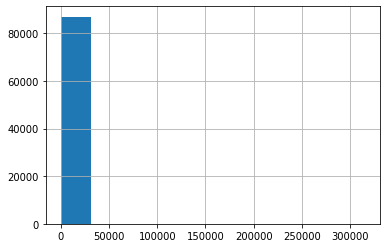

In [8]:
FIRE_SIZE = numerical["FIRE_SIZE"]
FIRE_SIZE.hist()

In [9]:
log_fire_size = pd.DataFrame(np.log(FIRE_SIZE))
log_fire_size = log_fire_size.replace([np.inf, -np.inf], np.nan)
log_fire_size = log_fire_size.fillna(0)
log_fire_size = (log_fire_size - log_fire_size.mean()) / log_fire_size.std()

### Basic Neural Network Model

In [ ]:
!pip install geopandas geoplot

In [12]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [13]:
gdf = geopandas.GeoDataFrame(
    cleaned, geometry=geopandas.points_from_xy(cleaned.LONGITUDE, cleaned.LATITUDE))
world = geopandas.read_file("/content/drive/Shareddrives/Data Science 303 Group Project/shape_files/s_11au16/s_11au16.shp")
california_shape = world[world.STATE == "CA"]

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


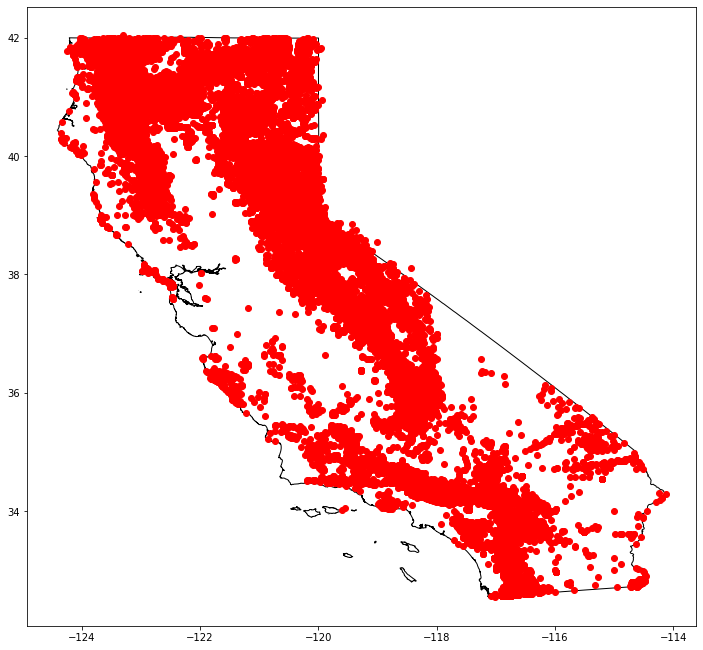

In [ ]:
ax = california_shape.plot(cleaned,
    color='white', edgecolor='black', figsize=(12, 12))
gdf.iloc[:40000].plot(ax=ax, color='red')
plt.show()

<class 'geopandas.geodataframe.GeoDataFrame'>


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


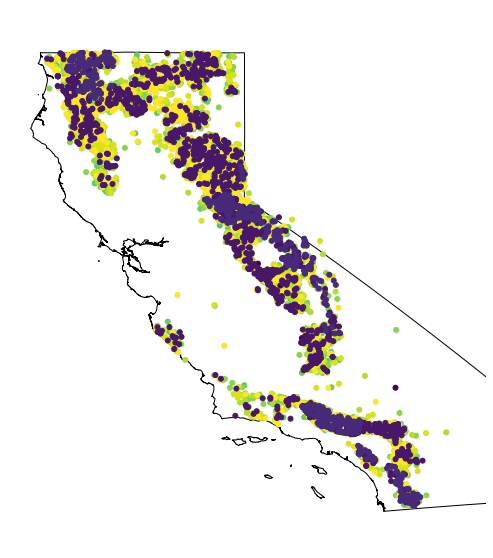

In [ ]:
import geoplot
import geoplot.crs as gcrs
print(type(california_shape))
ax = california_shape.plot(cleaned, color='white', edgecolor='black', figsize=(10,10))
# legend=True, legend_kwargs={'orientation': 'vertical'}
geoplot.pointplot(gdf.iloc[:10000], hue='FIRE_YEAR', ax=ax)
plt.show()


Text(0.5, 1.0, 'California Wildfire Heat Map')

<Figure size 432x288 with 0 Axes>

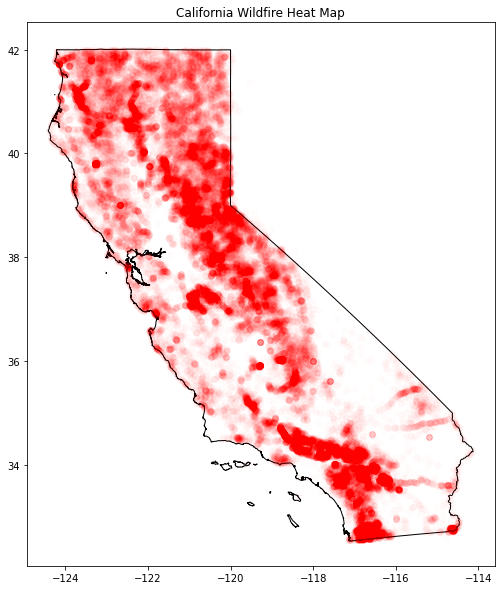

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig, ax = plt.subplots(1,1, figsize=(10,10))
fig = plt.figure()
ax = california_shape.plot(color='white', edgecolor='black', figsize=(10,10), legend=True)
ax.scatter(gdf.iloc[:-1].LONGITUDE, gdf.iloc[:-1].LATITUDE, alpha=.01, color="r")
ax.set_title("California Wildfire Heat Map")


Text(0.5, 1.0, 'California Wildfire Heat Map')

<Figure size 432x288 with 0 Axes>

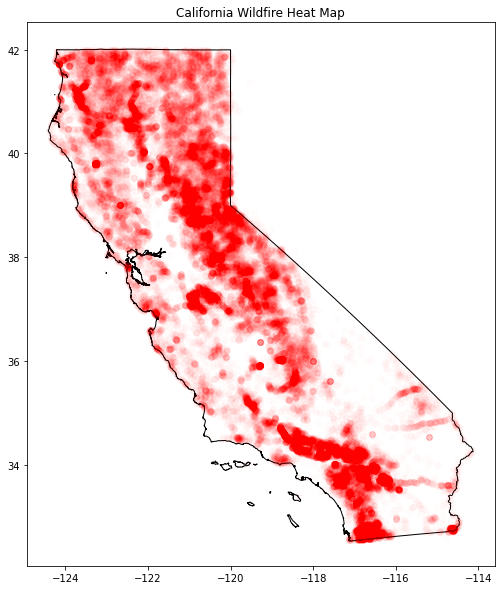

In [ ]:
fig = plt.figure()
ax = california_shape.plot(color='white', edgecolor='black', figsize=(10,10), legend=True)
ax.scatter(gdf.iloc[:-1].LONGITUDE, gdf.iloc[:-1].LATITUDE, alpha=.01, color="r")
ax.set_title("California Wildfire Heat Map")

Text(0.5, 1.0, 'California Wildfires - Acres Burned per Fire')

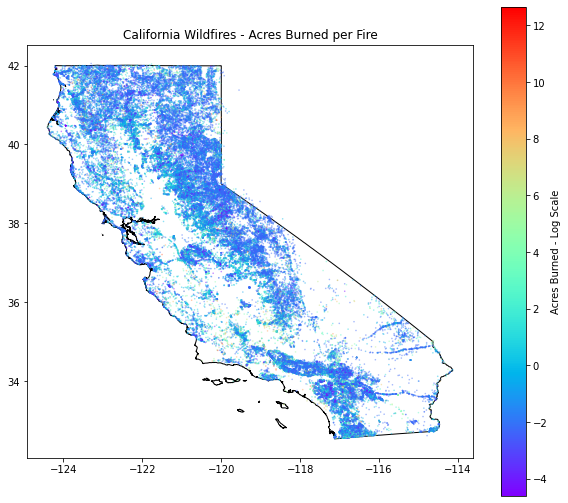

In [ ]:
# https://towardsdatascience.com/plotting-maps-with-geopandas-428c97295a73
gdf["fire_size_log"] = np.log(gdf["FIRE_SIZE"])

fig, ax = plt.subplots(figsize=(10,10))
california_shape.plot(color='white', edgecolor='black', ax=ax)
gdf.plot(ax=ax, cmap="rainbow", column="fire_size_log", alpha=0.4, markersize=0.4, legend=True, legend_kwds={'shrink': 0.9, "label": "Acres Burned - Log Scale"})
ax.set_title("California Wildfires - Acres Burned per Fire")


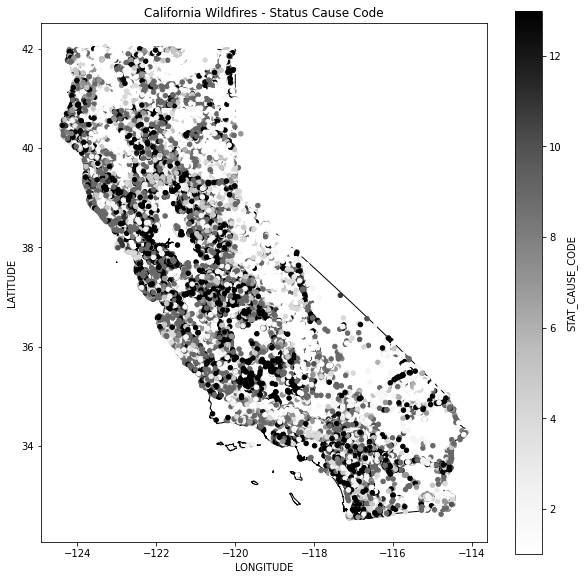

In [ ]:
for i in range(1, 2):
  fig, ax = plt.subplots(figsize=(10,10))
  california_shape.plot(color='white', edgecolor='black', ax=ax)
  gdf.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", ax=ax, lbe="STAT_CAUSE_CODE")
  # gdf[gdf["STAT_CAUSE_CODE"] == 4].plot(kind="scatter", ax=ax, column="STAT_CAUSE_CODE", alpha=1, markersize=0.2, label="3", legend=True)
  ax.set_title("California Wildfires - Status Cause Code")

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 87106 entries, 0 to 87105
Columns: 303 entries, Unnamed: 0 to fire_size_log
dtypes: float64(286), geometry(1), int64(7), object(9)
memory usage: 202.0+ MB


None

Text(0.5, 1.0, 'California Wildfires - Status Cause Code')

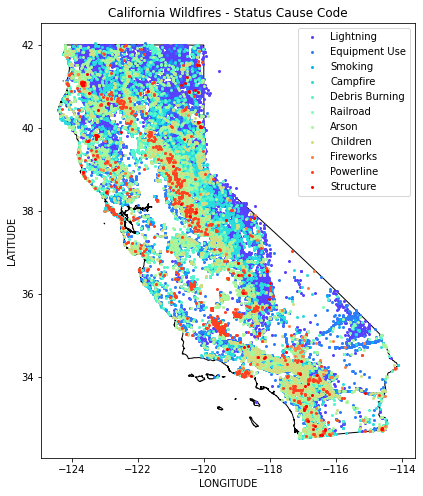

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
display(gdf.info())
# Source: https://stackoverflow.com/questions/28033046/matplotlib-scatter-color-by-categorical-factors

status_cause_codes = set(range(1, 13))
code_names = {9: 'Miscellaneous', 1: 'Lightning', 5: 'Debris Burning', 4: 'Campfire', 2: 'Equipment Use', 8: 'Children', 7: 'Arson', 3: 'Smoking', 6: 'Railroad', 10: 'Fireworks', 12: 'Structure', 11: 'Powerline', 13: 'Missing/Undefined'}


hot = plt.get_cmap('rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=len(status_cause_codes))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

fig, ax = plt.subplots(figsize=(8,8))
california_shape.plot(color='white', edgecolor='black', ax=ax)
point_size = 4

for i in status_cause_codes:
  if i != 9:
    index = gdf["STAT_CAUSE_CODE"] == i
    gdf_p = gdf[index]
    gdf_p.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", ax=ax, alpha=1, s=point_size, label=code_names[i], color=scalarMap.to_rgba(i))
ax.set_title("California Wildfires - Status Cause Code")


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 87106 entries, 0 to 87105
Columns: 303 entries, Unnamed: 0 to fire_size_log
dtypes: float64(286), geometry(1), int64(7), object(9)
memory usage: 202.0+ MB


None

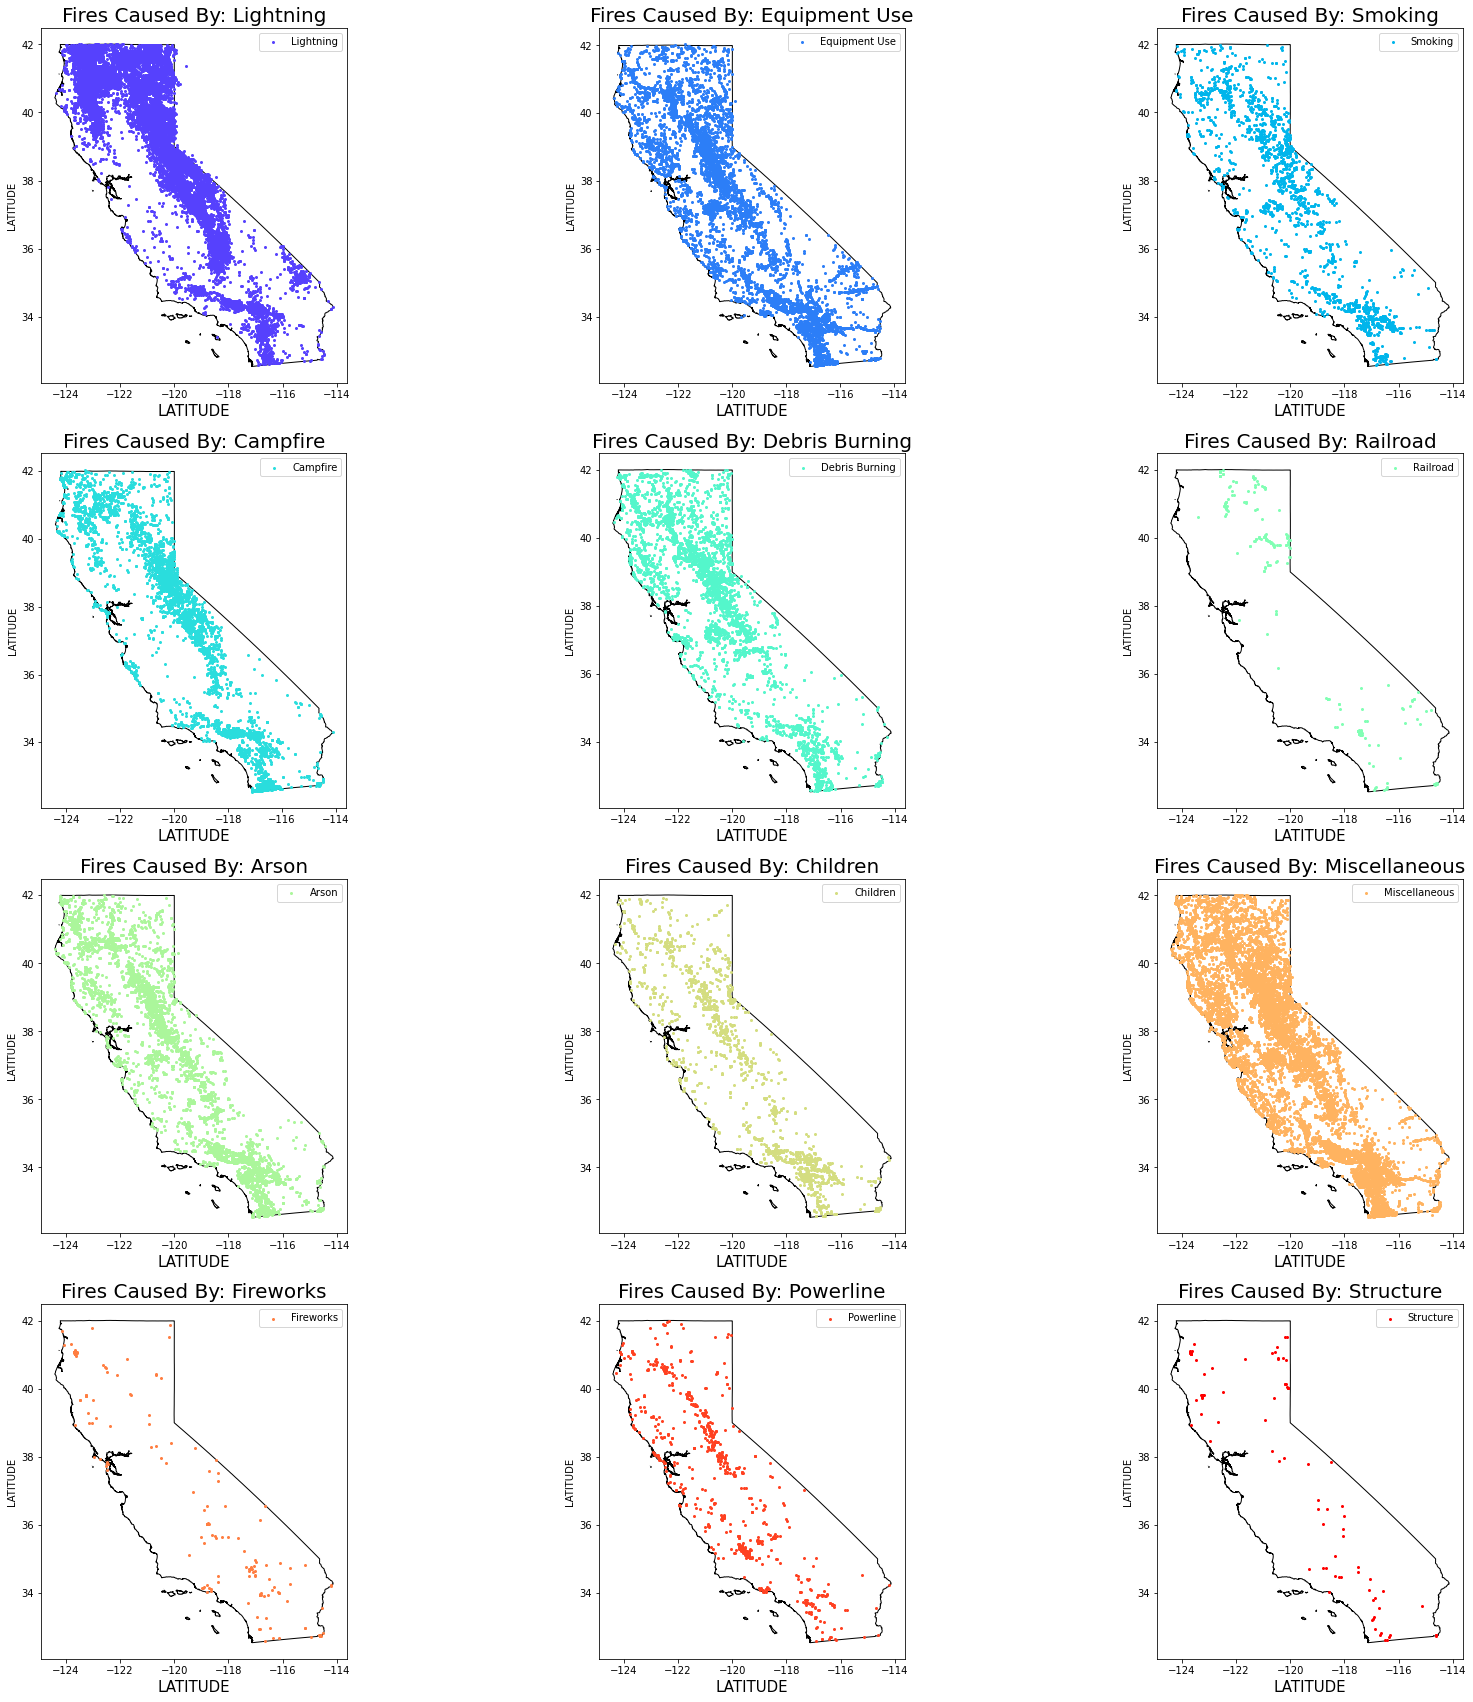

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
display(gdf.info())
# Source: https://stackoverflow.com/questions/28033046/matplotlib-scatter-color-by-categorical-factors

status_cause_codes = set(range(1, 13))
code_names = {9: 'Miscellaneous', 1: 'Lightning', 5: 'Debris Burning', 4: 'Campfire', 2: 'Equipment Use', 8: 'Children', 7: 'Arson', 3: 'Smoking', 6: 'Railroad', 10: 'Fireworks', 12: 'Structure', 11: 'Powerline', 13: 'Missing/Undefined'}


hot = plt.get_cmap('rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=len(status_cause_codes))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

scale = 10
fig, ax = plt.subplots(4, 3)
plt.subplots_adjust(wspace=0, hspace=0.2)

point_size = 4

i = 1
for r in range(4):
  for c in range(3):
    california_shape.plot(color='white', edgecolor='black', ax=ax[r,c])
    index = gdf["STAT_CAUSE_CODE"] == i
    gdf_p = gdf[index]
    gdf_p.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", ax=ax[r, c], alpha=1, s=point_size, label=code_names[i], color=scalarMap.to_rgba(i), figsize=(30,30))
    ax[r,c].set_title(f"Fires Caused By: { code_names[i] }", fontsize=20)
    ax[r,c].set_xlabel("LONGITUDE", fontsize=15)
    ax[r,c].set_xlabel("LATITUDE", fontsize=15)
    i += 1

# for i in status_cause_codes:
#     index = gdf["STAT_CAUSE_CODE"] == i
#     gdf_p = gdf[index]
#     gdf_p.plot(x="LONGITUDE", y="LATITUDE", kind="scatter", ax=ax, alpha=1, s=point_size, label=code_names[i], color=scalarMap.to_rgba(i))
# ax.set_title("California Wildfires - Status Cause Code")